In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import bullet, dataset, distance, error, output, speed, split
np.seterr('raise')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
data = dataset.load_trajectory(898, 1393786760018)
head, tail = split.split_trajectory_with_overlap(data, 0.75)

# print(head[-10:], '\n\n', tail[:10])

In [3]:
speed.calculate_speed_in_ms(head[-2], head[-1])

3.0618336105497335

In [4]:
head_x, head_y = head[:, 0], head[:, 1]
tail_x, tail_y = tail[:, 0], tail[:, 1]

prediction = bullet.bullet_prediction(head, 60)
pred_x, pred_y = prediction[:, 0], prediction[:, 1]

print(distance.calculate_trajectory_length_in_meters(tail))
print(distance.calculate_trajectory_length_in_meters(prediction))

1228.617344478807
162.51945247631156


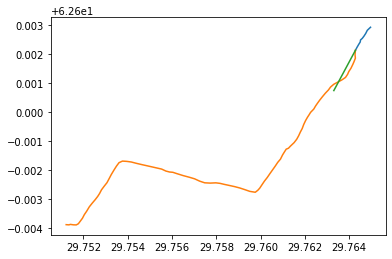

1228.617344478807
162.51945247631156


In [5]:
head_y, head_x = head_y[-10:], head_x[-10:]
plt.plot(head_y, head_x)
plt.plot(tail_y, tail_x)
plt.plot(pred_y, pred_x)
plt.show()

print(distance.calculate_trajectory_length_in_meters(tail))
print(distance.calculate_trajectory_length_in_meters(prediction))

output.output_coordinates_to_file("../head.txt", head)
output.output_coordinates_to_file("../tail.txt", tail)
output.output_coordinates_to_file("../pred.txt", prediction)

In [6]:
errors = error.calculate_error_vector(tail, prediction)
print(errors[:, 4])

[ 0.          5.69595914  9.87530025 11.44736326 11.43344185 13.07842951
 12.87832519 12.59298052 11.95152058  7.63410228  4.50514083  7.79059077
 11.5322677  12.73252836]


In [7]:
SECONDS = 60 # 1 minute
USER_ID = 898
RATIO = 0.5
trajectory_ids = dataset.get_list_of_users_trajectory_ids(USER_ID)

errors = []
failed = 0

for trajectory_id in trajectory_ids:
    print(trajectory_id, end='')
    target_trajectory = dataset.load_trajectory(USER_ID, trajectory_id)
    head, tail = split.split_trajectory_with_overlap(target_trajectory, RATIO)
    prediction = bullet.bullet_prediction(head, SECONDS)

    if np.size(prediction, 0) < 2:
        failed += 1
        print(' failed')
        continue

    pred_dist = distance.calculate_trajectory_length_in_meters(prediction)

    if len(prediction) > 0 and np.size(prediction, 0) > 0 and np.size(prediction, 1) == 4 and pred_dist > 0:
        error_amount = error.calculate_error_vector(tail, prediction)[:, 4]
        print(' success', pred_dist, len(error_amount), sum(error_amount))
        errors.append(error_amount)
    else:
        failed += 1
        print(' failed')

errors_sum = list(map(sum, errors))

print(
    '\nERROR STATISTICS',
    '\naverage\t\t\t', np.average(errors_sum),
    '\nmedian\t\t\t', np.median(errors_sum),
    '\nstandard deviation\t', np.std(errors_sum),
    '\nfailed predictions\t', failed
)


1399399033400 success 82.78841384875302 14 62.90762508614293
1412515702026 success 222.54485318425276 14 1592.3377700298256
1413382616849 success 34.99751591188333 14 747.3764428118977
1379951571859 success 80.78166883799457 29 1446.9567560223234
1379694392068 success 264.1944923031764 31 1803.106772459939
1407168712392 success 94.29809519040919 14 327.0855957682402
1400436362445 success 257.73731122233136 14 548.8514164353658
1407593205810 success 204.9779030109353 14 249.31007326747272
1396953544784 success 103.34398387360604 14 225.6422770014179
1408208026280 success 316.910976612077 14 620.9287328386276
1404054152819 success 191.41605631944722 14 75.52580633943177
1401891357857 success 277.49059574786384 14 110.12911362436378
1394042416405 success 80.41619638406075 14 22.975560778399643
1380211927794 success 70.15100483227098 28 515.6186388687148
1377681725292 success 267.17536587122737 20 839.9927350028519
1397840479593 success 2068.60069065516 14 2712.646337911888
1398930716368 s

1379750070367 success 43.56391511552492 20 98.52783393460574
1404064273726 success 74.95842516102915 14 433.12764621662575
1402678393735 success 36.92143009878982 14 471.3767796479048
1377788791350 success 170.74002142279974 30 1761.7564584009326
1404468390177 success 204.16321848476022 14 1319.837066810805
1408288153631 success 227.13761789520362 15 890.1501450539914
1411964134234 success 80.59298457772081 14 114.78504248933814
1401629100713 failed
1378655206255 success 246.0935671006711 28 2360.447846433497
1402158474401 failed
1379302234528 success 58.93903152359864 27 1319.299496120615
1412417616700 success 80.00636012474983 14 690.9383460400081
1378141680529 success 106.10316966806924 20 456.2418421714844
1404389296311 success 231.61666308457987 14 406.55445831019887
1377503869598 success 226.9688822870815 29 559.9145182186171
1405012891914 success 73.6866834337622 15 253.95026497401204
1399295150237 success 209.97525356841348 14 250.568274217365
1393786760018 success 251.81977805